# Multiclass Classification Model for Breast Tissue

# New Section

Data Source: https://archive.ics.uci.edu/ml/datasets/Breast+Tissue

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
#Implementing Standard Scalar
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import pandas
import pandas as pd

# read the dataset
#df = pd.read_csv('BreastTissue.csv')
df = pd.read_csv("/content/drive/MyDrive/Speed Offset Dataset/Master Dataset Sorted_V2.csv")

df.head()

,Unnamed: 0,type,rcvTime,sendTime,sender,senderPseudo,messageID,file_name,density_level,pos_x,...,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z,attack?,receiver_id
0,175190,3,50408.529003,50408.529003,21.0,10215.0,16936.0,traceJSON-27-25-A0-50408-14,2,220.206429,...,0.000070,0.0,-0.138860,0.990312,0.0,19.363807,18.228720,0.0,0,27
1,175190,3,50408.529003,50408.529003,21.0,10215.0,16936.0,traceJSON-27-25-A0-50408-14,2,220.177291,...,0.000054,0.0,-0.140787,0.990040,0.0,20.032040,18.857782,0.0,0,27
2,99611,3,50408.836187,50408.836187,27.0,10275.0,17018.0,traceJSON-21-19-A0-50408-14,2,223.157410,...,0.000732,0.0,-0.145857,0.989306,0.0,15.102077,14.198117,0.0,0,21
3,99611,3,50408.836187,50408.836187,27.0,10275.0,17018.0,traceJSON-21-19-A0-50408-14,2,223.323122,...,0.001140,0.0,-0.142671,0.989770,0.0,6.733455,6.330412,0.0,0,21
4,175191,3,50409.529003,50409.529003,21.0,10215.0,17075.0,traceJSON-27-25-A0-50408-14,2,220.129016,...,0.000028,0.0,-0.140787,0.990040,0.0,20.732579,14.964286,0.0,0,27


In [4]:
print(df.shape)

num_of_classes = len(df['attack?'].unique())
print(num_of_classes)

df.describe()

(1640194, 35)
3


,Unnamed: 0,type,rcvTime,sendTime,sender,senderPseudo,messageID,density_level,pos_x,pos_y,...,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z,attack?,receiver_id
count,1.640194e+06,1640194.0,1.640194e+06,1.640194e+06,1.640194e+06,1.640194e+06,1.640194e+06,1640194.0,1.640194e+06,1.640194e+06,...,1.640194e+06,1640194.0,1.640194e+06,1.640194e+06,1640194.0,1.640194e+06,1.640194e+06,1640194.0,1.640194e+06,1.640194e+06
mean,4.100480e+05,3.0,5.336191e+04,5.336191e+04,4.668518e+03,9.986460e+05,9.741265e+06,2.0,4.660051e+02,6.471128e+02,...,9.265796e-04,0.0,-1.047617e-01,4.587984e-02,0.0,1.369501e+01,1.353069e+01,0.0,4.537110e-01,4.668531e+03
std,2.367417e+05,0.0,2.030831e+03,2.030831e+03,2.755658e+03,6.343360e+05,5.518491e+06,0.0,3.784639e+02,2.857730e+02,...,2.306418e-03,0.0,6.221190e-01,7.745247e-01,0.0,1.364266e+01,1.473513e+01,0.0,7.418434e-01,2.755658e+03
min,0.000000e+00,3.0,5.040853e+04,5.040853e+04,9.000000e+00,1.095000e+03,1.693600e+04,2.0,2.473259e+01,2.432582e+01,...,0.000000e+00,0.0,-1.000000e+00,-1.000000e+00,0.0,1.717641e-03,2.908407e-03,0.0,0.000000e+00,9.000000e+00
25%,2.050240e+05,3.0,5.186216e+04,5.186216e+04,2.565000e+03,1.025655e+06,5.372904e+06,2.0,1.831697e+02,3.934937e+02,...,6.567341e-06,0.0,-7.128562e-01,-8.338102e-01,0.0,4.434596e+00,3.667235e+00,0.0,0.000000e+00,2.565000e+03
50%,4.100480e+05,3.0,5.283783e+04,5.283783e+04,4.371000e+03,1.043715e+06,9.513267e+06,2.0,2.479727e+02,6.898789e+02,...,8.036214e-05,0.0,-3.487441e-02,6.684078e-02,0.0,1.014437e+01,8.684763e+00,0.0,0.000000e+00,4.371000e+03
75%,6.150720e+05,3.0,5.491395e+04,5.491395e+04,6.903000e+03,1.069035e+06,1.435181e+07,2.0,7.770749e+02,8.923821e+02,...,8.167971e-04,0.0,1.118553e-01,9.875791e-01,0.0,1.759468e+01,1.745873e+01,0.0,1.000000e+00,6.903000e+03
max,8.200960e+05,3.0,5.759992e+04,5.759992e+04,1.011300e+04,1.010114e+07,1.986612e+07,2.0,1.396080e+03,1.359690e+03,...,9.409999e-02,0.0,1.000000e+00,1.000000e+00,0.0,1.033743e+02,1.071460e+02,0.0,2.000000e+00,1.011300e+04


In [5]:
df['attack?'].value_counts()

0    1144078
2     248058
1     248058
Name: attack?, dtype: int64

In [6]:
#df['attack?'].index

In [7]:
df.columns

Index(['Unnamed: 0', 'type', 'rcvTime', 'sendTime', 'sender', 'senderPseudo',
       'messageID', 'file_name', 'density_level', 'pos_x', 'pos_y', 'pos_z',
       'pos_noise_x', 'pos_noise_y', 'pos_noise_z', 'spd_x', 'spd_y', 'spd_z',
       'spd_noise_x', 'spd_noise_y', 'spd_noise_z', 'acl_x', 'acl_y', 'acl_z',
       'acl_noise_x', 'acl_noise_y', 'acl_noise_z', 'hed_x', 'hed_y', 'hed_z',
       'hed_noise_x', 'hed_noise_y', 'hed_noise_z', 'attack?', 'receiver_id'],
      dtype='object')

In [8]:
#Version 1: All features
# df.drop(['Unnamed: 0','type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
#                   'acl_z','acl_noise_z','hed_z','hed_noise_z',
#                   'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
#                  'hed_noise_x','hed_noise_y','density_level'],axis=1,inplace=True)

#Version 2 (Without RcvTime, SendTime, RcvID, SenderID, SendPseudo, MessageID)
# df.drop(['Unnamed: 0','type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
#                   'acl_z','acl_noise_z','hed_z','hed_noise_z',
#                   'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
#                  'hed_noise_x','hed_noise_y','density_level', 
#                   'rcvTime', 'sendTime', 'sender', 'senderPseudo', 'messageID','receiver_id'],axis=1,inplace=True)

# #Version 3 (Without SendTime, RcvID, SenderID, SendPseudo, MessageID) [Diff. between V2 and 3 is RcvTime]
df.drop(['Unnamed: 0','type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
                  'acl_z','acl_noise_z','hed_z','hed_noise_z',
                  'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
                 'hed_noise_x','hed_noise_y','density_level', 
                              'sendTime', 'sender', 'senderPseudo', 'messageID','receiver_id'],axis=1,inplace=True)

In [9]:
df.columns

Index(['rcvTime', 'pos_x', 'pos_y', 'spd_x', 'spd_y', 'acl_x', 'acl_y',
       'hed_x', 'hed_y', 'attack?'],
      dtype='object')

In [10]:
# getting number of rows
# Splitting

row_count = df.shape[0]
#print(row_count)

row_train = round(row_count*0.8)
row_test = round(row_count-row_train)

print(row_train)
print(row_test)

1312155
328039


In [11]:
df_train = df.head(row_train)
print(df_train.shape)

df_test = df.tail(row_test)
print(df_test.shape)

(1312155, 10)
(328039, 10)


In [12]:
#Train test split

#TRAINING

#Version 1
#X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime', 'sendTime', 'receiver_id', 'sender','senderPseudo','messageID']]

#Version 2
#X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y']]

#Version 3
X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime']]

#Common for all 3
y_train = df_train['attack?']

#TESTING

#Version 1
#X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime', 'sendTime', 'receiver_id', 'sender','senderPseudo','messageID']]

#Version 2
#X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y']]

#Version 3
X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime']]

#Common for all 3
y_test = df_test['attack?']

# print(y_test.value_counts())

In [13]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1312155, 9), (328039, 9), (1312155,), (328039,))

In [15]:
# data normalization with sklearn

from sklearn.preprocessing import MinMaxScaler

#Implementing Standard Scalar

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

#Implementing Standard Scalar

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

TAWHEED CODE END

In [ ]:
# # split train input and output data
# X = df.drop(axis=0, columns=['Class', 'Case #'])
# Y = df.Class

# #Print the shape of X and Y
# print(X.shape)
# print(Y.shape)

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Accuracy Train mlp for : 95.76421992828591
Execution Time for train: 3.5645883083343506
ROC_AUC Score MLP: 0.8808651844250243
Accuracy Test MLP: 88.04197061934708
Execution Time for Test MLP: 1.1885795593261719

[[0.93621488 0.01275702 0.0510281 ]
 [0.01353108 0.71842747 0.26804145]
 [0.02017473 0.19768387 0.78214141]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    229599
           1       0.74      0.72      0.73     49220
           2       0.61      0.78      0.68     49220

    accuracy                           0.88    328039
   macro avg       0.78      0.81      0.79    328039
weighted avg       0.90      0.88      0.89    328039

MLP confusion matrix
[[0.93621488 0.01275702 0.0510281 ]
 [0.01353108 0.71842747 0.26804145]
 [0.02017473 0.19768387 0.78214141]]


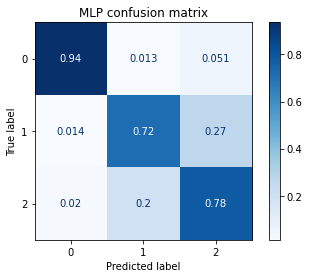

In [ ]:
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes=(45, 30, 15), batch_size=128)
mlp.fit(X_train,y_train)

#Time calc for train
start_time_train = time.time()
#Train Accuracy
y_train_mlp = mlp.predict(X_train)
print('Accuracy Train mlp for :', accuracy_score(y_train, y_train_mlp)*100)

end_time_train = time.time()
execution_time_train = end_time_train - start_time_train
print('Execution Time for train:', execution_time_train)

#Time calc for test
start_time_test = time.time()

val_mlp = mlp.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val_mlp)

print('ROC_AUC Score MLP:', roc_auc_score(y_test_lb, val_lb, average='macro'))

print('Accuracy Test MLP:', accuracy_score(y_test, val_mlp)*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for Test MLP:', execution_time_test)
print()

#Evaluating the MLP algorithm
print(confusion_matrix(y_test, val_mlp, normalize='true'))
print(classification_report(y_test, val_mlp))

#Printing the confusion matrix graph
disp = ConfusionMatrixDisplay.from_estimator(
      mlp,
      X_test,
      y_test,
      display_labels=[0,1,2],
      cmap=plt.cm.Blues,
      normalize='true',
  )
disp.ax_.set_title("MLP confusion matrix")

print("MLP confusion matrix")
print(disp.confusion_matrix)

In [ ]:
#MLP score with Cross validation
start_time_test = time.time()

mlp_Cross = cross_val_score(mlp, X_train, y_train, cv = 3)
mlp_Cross_mean = mlp_Cross.mean()
print('Mean_Accuracy Kfold mlp:', mlp_Cross_mean*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for mlp Cross Val:', execution_time_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=num_of_classes)

xgb.fit(X_train,y_train)

#Time calc for train
start_time_train = time.time()
#Train Accuracy
y_train_xg = xgb.predict(X_train)
print('Accuracy Train XG for :', accuracy_score(y_train, y_train_xg)*100)
end_time_train = time.time()
execution_time_train = end_time_train - start_time_train
print('Execution Time for train:', execution_time_train)

# #Time calc for test
# start_time_test = time.time()

# #Test Accuracy
# # make predictions for test data
# # evaluate predictions

# #pred = xgb.predict(X_test)
# val = xgb.predict(X_test)

# lb = preprocessing.LabelBinarizer()
# lb.fit(y_test)

# y_test_lb = lb.transform(y_test)
# val_lb = lb.transform(val)

# roc_auc_score(y_test_lb, val_lb, average='macro')

# print('Accuracy Test XG:', accuracy_score(y_test, pred)*100)

# end_time_test = time.time()
# execution_time_test = end_time_test - start_time_test
# print('Execution Time for test:', execution_time_test)


Accuracy Train XG for : 90.76633476990142
Execution Time for train: 11.702541828155518


In [ ]:
#Time calc for test
start_time_test = time.time()

#Test Accuracy
# make predictions for test data
# evaluate predictions

pred = xgb.predict(X_test)
val = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

print('ROC_AUC Score:', roc_auc_score(y_test_lb, val_lb, average='macro'))

print('Accuracy Test XG:', accuracy_score(y_test, val)*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for test:', execution_time_test)


ROC_AUC Score: 0.8547943299036196
Accuracy Test XG: 90.26609640926841
Execution Time for test: 6.142225503921509


In [ ]:
#Evaluating the XG algorithm
print(confusion_matrix(y_test, val, normalize='true'))
print(classification_report(y_test, val))

[[9.98101037e-01 2.26481823e-04 1.67248115e-03]
 [1.42726534e-01 8.33929297e-01 2.33441690e-02]
 [1.99024787e-01 2.61702560e-01 5.39272653e-01]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    229599
           1       0.76      0.83      0.80     49220
           2       0.95      0.54      0.69     49220

    accuracy                           0.90    328039
   macro avg       0.88      0.79      0.82    328039
weighted avg       0.91      0.90      0.90    328039



In [ ]:
#Manual code for normalizing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, val)
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# cm

# disp = ConfusionMatrixDisplay.from_estimator(
#         classifier,
#         X_test,
#         y_test,
#         display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# # Normalise
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show(block=False)

Normalized XG Boost confusion matrix
[[9.97970374e-01 2.48258921e-04 1.78136664e-03]
 [1.48638765e-01 8.28565624e-01 2.27956115e-02]
 [2.08147095e-01 2.59691182e-01 5.32161723e-01]]


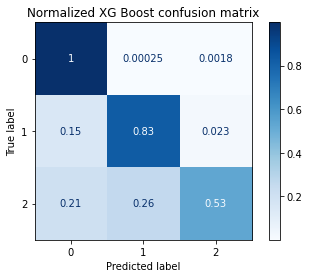

In [ ]:
from unicodedata import normalize
disp = ConfusionMatrixDisplay.from_estimator(
        xgb,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
disp.ax_.set_title("Normalized XG Boost confusion matrix")

print("Normalized XG Boost confusion matrix")
print(disp.confusion_matrix)

In [ ]:
# #class_names = df.target_names
# from sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt

# disp = plot_confusion_matrix(xgb, X_test, y_test,
#                                  display_labels= [0,1,2],
#                                  cmap=plt.cm.Blues)
# plt.show()

In [ ]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.tail()

,Expected Output,Predicted Output
1640189,0,0
1640190,0,0
1640191,0,0
1640192,0,0
1640193,0,0


In [ ]:
 #XGBoost score with Cross validation
from sklearn.model_selection import cross_val_score
start_time_test = time.time()

XG_Cross = cross_val_score(xgb, X_train, y_train, cv = 5)
XG_Cross_mean = XG_Cross.mean()
print('Mean_Accuracy Kfold XG:', XG_Cross_mean*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for XG Cross Val:', execution_time_test)

Mean_Accuracy Kfold XG: 84.40854929486227
Execution Time for XG Cross Val: 1191.9396781921387


Accuracy Train KNN for : 3 : 99.73158658847468
Execution Time for train: 3 : 48.03382754325867
ROC_AUC Score: 0.812498200175566
Accuracy Test XG: 84.43355820496953
[[0.94834037 0.01612812 0.03553151]
 [0.10967087 0.52783421 0.36249492]
 [0.18006908 0.1442503  0.67568062]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94    229599
           1       0.71      0.53      0.60     49220
           2       0.56      0.68      0.61     49220

    accuracy                           0.84    328039
   macro avg       0.74      0.72      0.72    328039
weighted avg       0.85      0.84      0.84    328039

Execution Time for test: 49.66426491737366
Mean_Accuracy Kfold KNN for neighbors: 3 : 88.2539029306751
Execution Time for neighbors: 176.3360297679901
Normalized KNN confusion matrix
[[0.94834037 0.01612812 0.03553151]
 [0.10967087 0.52783421 0.36249492]
 [0.18006908 0.1442503  0.67568062]]
=========================END==========================

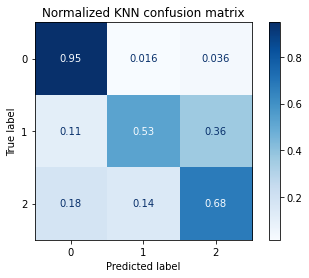

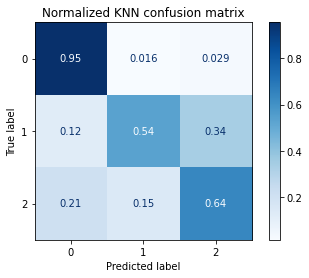

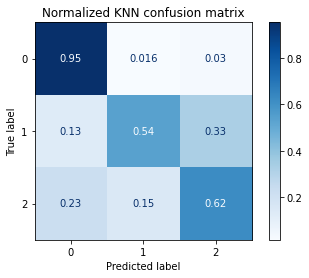

In [ ]:
#KNN score with Cross validation

def KNN_CrossVal(classifier, neighbors):
  start_time = time.time()

  kfold_Acc_Knn = cross_val_score(classifier, X_train, y_train, cv = 5)
  kfold_Acc_Knn_mean = kfold_Acc_Knn.mean()

  end_time = time.time()
  execution_time = end_time-start_time
  print('Mean_Accuracy Kfold KNN for neighbors:', neighbors, ":", kfold_Acc_Knn_mean*100)
  print('Execution Time for neighbors:', execution_time)

#KNN Training
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_range =[3,7,9]

for neighbors in n_neighbors_range:

  classifier_KNN = KNeighborsClassifier(neighbors)
  classifier_KNN.fit(X_train, y_train)

  #Time calc for train
  start_time_train = time.time()
  #Train Accuracy
  y_train_knn = classifier_KNN.predict(X_train)
  print('Accuracy Train KNN for :', neighbors, ':', accuracy_score(y_train, y_train_knn)*100)
  end_time_train = time.time()
  execution_time_train = end_time_train - start_time_train
  print('Execution Time for train:', neighbors, ':', execution_time_train)


  #Time calc for test
  start_time_test = time.time()

  #pred = xgb.predict(X_test)
  val_knn = classifier_KNN.predict(X_test)

  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)

  y_test_lb = lb.transform(y_test)
  val_lb = lb.transform(val_knn)

  print('ROC_AUC Score:', roc_auc_score(y_test_lb, val_lb, average='macro'))

  print('Accuracy Test XG:', accuracy_score(y_test, val_knn)*100)

  # end_time_test = time.time()
  # execution_time_test = end_time_test - start_time_test
  # print('Execution Time for test:', execution_time_test)

  # #Test Accuracy
  # y_pred_knn = classifier.predict(X_test)
  # print('Accuracy Test KNN:', neighbors, ':', accuracy_score(y_test, y_pred_knn)*100)

  #Evaluating the KNN algorithm
  print(confusion_matrix(y_test, val_knn, normalize='true'))
  print(classification_report(y_test, val_knn))

  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for test:', execution_time_test)
  print("================================================================")
  KNN_CrossVal(classifier_KNN, neighbors)
  print("================================================================")


  disp = ConfusionMatrixDisplay.from_estimator(
        classifier_KNN,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
  disp.ax_.set_title("Normalized KNN confusion matrix")

  print("Normalized KNN confusion matrix")
  print(disp.confusion_matrix)

  print("=========================END====================================")


Normalized KNN confusion matrix
[[0.87665887 0.03707769 0.08626344]
 [0.1416091  0.4998781  0.3585128 ]
 [0.24524584 0.13756603 0.61718813]]
Normalized KNN confusion matrix
[[0.88637146 0.03304021 0.08058833]
 [0.16200731 0.50430719 0.33368549]
 [0.26873222 0.14140593 0.58986184]]
Normalized KNN confusion matrix
[[0.88756049 0.03330154 0.07913798]
 [0.17021536 0.51056481 0.31921983]
 [0.2892117  0.14347826 0.56731004]]


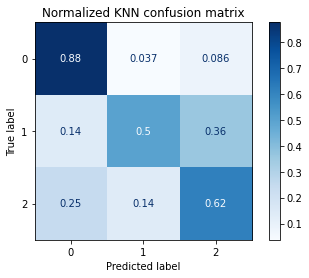

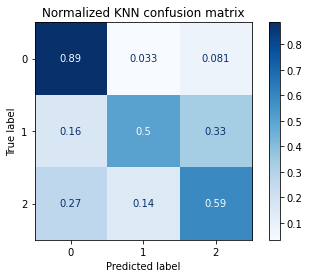

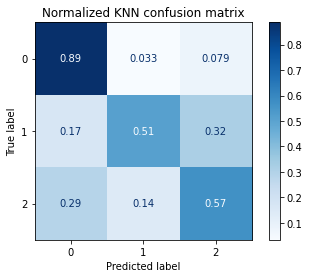

In [ ]:

#KNN CM graph

from sklearn.neighbors import KNeighborsClassifier
n_neighbors_range =[3,7,9]

for neighbors in n_neighbors_range:

  classifier_KNN = KNeighborsClassifier(neighbors)
  classifier_KNN.fit(X_train, y_train)
  from unicodedata import normalize
  disp = ConfusionMatrixDisplay.from_estimator(
        classifier_KNN,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
  disp.ax_.set_title("Normalized KNN confusion matrix")

  print("Normalized KNN confusion matrix")
  print(disp.confusion_matrix)

Accuracy_RF_train: 80 : 88.09530886213899
Execution Time for train: 80 : 6.638998985290527
ROC_AUC Score: 0.814639348498967
Accuracy Test XG: 87.98618456951765
Execution Time for Test: 80 1.973090648651123

[[9.99115850e-01 1.21951751e-04 7.62198442e-04]
 [1.98720033e-01 8.00670459e-01 6.09508330e-04]
 [3.37240959e-01 2.59995937e-01 4.02763104e-01]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    229599
           1       0.75      0.80      0.78     49220
           2       0.99      0.40      0.57     49220

    accuracy                           0.88    328039
   macro avg       0.88      0.73      0.76    328039
weighted avg       0.89      0.88      0.86    328039

RF confusion matrix
[[9.99115850e-01 1.21951751e-04 7.62198442e-04]
 [1.98720033e-01 8.00670459e-01 6.09508330e-04]
 [3.37240959e-01 2.59995937e-01 4.02763104e-01]]


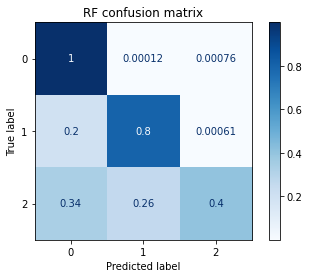

In [16]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

#array of n_estimators

#estimators = [10,30,50,60,80,100, 130, 150, 170, 200]
estimators = [80]
# Fitting the classifier into the Training set
for i in estimators:
  #start_time = time.time()  
  
  classifierRF = RandomForestClassifier(n_estimators = i, max_depth = 6, criterion = 'entropy', random_state = 0, max_features='auto')
  classifierRF.fit(X_train, y_train)

  start_time_train = time.time()
  y_pred_rf_train = classifierRF.predict(X_train)
  print('Accuracy_RF_train:',i,':',accuracy_score(y_train, y_pred_rf_train)*100)
  end_time_train = time.time()
  execution_time_train = end_time_train - start_time_train
  print('Execution Time for train:', i, ':',execution_time_train)

  #Test
  start_time_test = time.time()

  #pred = xgb.predict(X_test)
  val_rf = classifierRF.predict(X_test)

  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)

  y_test_lb = lb.transform(y_test)
  val_lb = lb.transform(val_rf)

  print('ROC_AUC Score:', roc_auc_score(y_test_lb, val_lb, average='macro'))

  print('Accuracy Test XG:', accuracy_score(y_test, val_rf)*100)

  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for Test:', i, execution_time_test)
  print()

  #Evaluating the KNN algorithm
  print(confusion_matrix(y_test, val_rf, normalize='true'))
  print(classification_report(y_test, val_rf))

#Printing the confusion matrix graph
  disp = ConfusionMatrixDisplay.from_estimator(
        classifierRF,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
  disp.ax_.set_title("RF confusion matrix")

  print("RF confusion matrix")
  print(disp.confusion_matrix)




  # y_pred_rf = classifierRF.predict(X_test)
  # print('Accuracy_RF_test for depth:',i, ' :' ,accuracy_score(y_test, y_pred_rf)*100)

  # print(confusion_matrix(y_test,y_pred_rf))
  # print(classification_report(y_test,y_pred_rf))

  # end_time_test = time.time()
  # execution_time_test = end_time_test - start_time_test
  # print('Execution Time for Test:', i, execution_time_test)
  # print()

  # print('Accuracy Results for RF')

  # print(confusion_matrix(y_test,y_pred_rf))
  # print(classification_report(y_test,y_pred_rf))
  
  # print('Accuracy_RF_train:',accuracy_score(y_train, y_pred_rf_train)*100)


In [17]:
#RF score with Cross validation
#estimators = [10,30,50,60,80,100, 130, 150, 170, 200]
estimators = [80]
from sklearn.ensemble import RandomForestClassifier
for i in estimators:
  start_time = time.time()  
  classifierRF = RandomForestClassifier(n_estimators = i, max_depth = 6, criterion = 'entropy', random_state = 0, max_features='auto')
  rf_Acc_Knn = cross_val_score(classifierRF, X_train, y_train, cv = 5)
  rfAcc_Knn_mean = rf_Acc_Knn.mean()

  print('Mean_Accuracy Kfold RF:', i,':', rfAcc_Knn_mean*100)

  end_time = time.time()
  execution_time = end_time - start_time
  print('Execution Time for K-fold:', i, ':', execution_time)

  print()

Mean_Accuracy Kfold RF: 80 : 87.10038067149078
Execution Time for K-fold: 80 : 926.6338748931885

